In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

In [2]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/all-agents/daily/20150101/20191028"
headers = {"accept": "application/json"}

In [4]:
r = requests.get(url, headers=headers)

In [19]:
type(r)

requests.models.Response

Check status code

In [5]:
r.status_code

200

Check out a few attributes

In [9]:
dict(r.headers)

{'Date': 'Tue, 29 Oct 2019 10:13:32 GMT',
 'Content-Type': 'application/json; charset=utf-8',
 'Content-Length': '13418',
 'Connection': 'keep-alive',
 'cache-control': 's-maxage=86400, max-age=86400',
 'x-request-id': 'f9020a00-fa32-11e9-8181-03371958b101',
 'server': 'restbase1018',
 'access-control-allow-origin': '*',
 'access-control-allow-methods': 'GET,HEAD',
 'access-control-allow-headers': 'accept, content-type, content-length, cache-control, accept-language, api-user-agent, if-match, if-modified-since, if-none-match, dnt, accept-encoding',
 'access-control-expose-headers': 'etag',
 'x-content-type-options': 'nosniff',
 'x-frame-options': 'SAMEORIGIN',
 'referrer-policy': 'origin-when-cross-origin',
 'x-xss-protection': '1; mode=block',
 'content-security-policy': "default-src 'none'; frame-ancestors 'none'",
 'x-content-security-policy': "default-src 'none'; frame-ancestors 'none'",
 'x-webkit-csp': "default-src 'none'; frame-ancestors 'none'",
 'Content-Encoding': 'gzip',
 'V

In [14]:
type(r.text)
# But we don't want a string

str

In [15]:
r.json()

{'items': [{'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070100',
   'views': 161504749},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070200',
   'views': 167766090},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070300',
   'views': 148435361},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070400',
   'views': 139733040},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070500',
   'views': 145273389},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'all-agents',
   'granularity': 'daily',
   'timestamp': '2015070600',
   'views': 181275052},
  {'project': 'en.wikiped

In [16]:
# What's the type of the json?
type(r.json())

dict

In [17]:
# Since it's a python dict, we can access the list of dicts through accessing the values of the key 'items'
r.json()["items"]

[{'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070100',
  'views': 161504749},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070200',
  'views': 167766090},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070300',
  'views': 148435361},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070400',
  'views': 139733040},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070500',
  'views': 145273389},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-agents',
  'granularity': 'daily',
  'timestamp': '2015070600',
  'views': 181275052},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'all-ag

In [18]:
df = pd.DataFrame(r.json()["items"])
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2015070100,161504749
1,en.wikipedia,desktop,all-agents,daily,2015070200,167766090
2,en.wikipedia,desktop,all-agents,daily,2015070300,148435361
3,en.wikipedia,desktop,all-agents,daily,2015070400,139733040
4,en.wikipedia,desktop,all-agents,daily,2015070500,145273389


Check out the dataframe

In [20]:
df.dtypes

project        object
access         object
agent          object
granularity    object
timestamp      object
views           int64
dtype: object

In [21]:
pd.to_datetime(df["timestamp"])

ValueError: year 2015070100 is out of range

Check the timestamp column

In [24]:
df["timestamp"].str.len().value_counts()

10    1581
Name: timestamp, dtype: int64

In [30]:
df["timestamp"].str[-2:].value_counts()

00    1581
Name: timestamp, dtype: int64

Now, we know that the last two trailing chars in a timestamp string are always "00", so we can remove them simply.
Or not remove them, but tell the pd.to_datetime method the pattern

In [32]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d00")

In [33]:
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2015-07-01,161504749
1,en.wikipedia,desktop,all-agents,daily,2015-07-02,167766090
2,en.wikipedia,desktop,all-agents,daily,2015-07-03,148435361
3,en.wikipedia,desktop,all-agents,daily,2015-07-04,139733040
4,en.wikipedia,desktop,all-agents,daily,2015-07-05,145273389


# Get some more data (for different access types)

Create a function that gets data from wikimedia for each access type

In [38]:
# url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/all-agents/daily/20150101/20191028"
# headers = {"accept": "application/json"}
# r = requests.get(url, headers=headers)
# df = pd.DataFrame(r.json()["items"])

ACCESS_TYPES = ["desktop", "mobile-app", "mobile-web"]

def get_wiki_data(access_type):
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/{access_type}/all-agents/daily/20150101/20191028"
    headers = {"accept": "application/json"}
    r = requests.get(url, headers=headers)
    df = pd.DataFrame(r.json()["items"])
    
    # Now, convert the timestamp column to a datetime
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d00")
    return df

In [40]:
# test
get_wiki_data(ACCESS_TYPES[2]).head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,all-agents,daily,2015-07-01,99945401
1,en.wikipedia,mobile-web,all-agents,daily,2015-07-02,99457993
2,en.wikipedia,mobile-web,all-agents,daily,2015-07-03,101562576
3,en.wikipedia,mobile-web,all-agents,daily,2015-07-04,109675800
4,en.wikipedia,mobile-web,all-agents,daily,2015-07-05,116756167


In [48]:
# Remove duplicated indices, sort values by timestamp and access_type
df = (pd
      .concat([get_wiki_data(access_type) for access_type in ACCESS_TYPES])
      .sort_values(["timestamp","access"])
      .reset_index(drop=True))
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2015-07-01,161504749
1,en.wikipedia,mobile-app,all-agents,daily,2015-07-01,3092637
2,en.wikipedia,mobile-web,all-agents,daily,2015-07-01,99945401
3,en.wikipedia,desktop,all-agents,daily,2015-07-02,167766090
4,en.wikipedia,mobile-app,all-agents,daily,2015-07-02,3115967


## Get daily total views

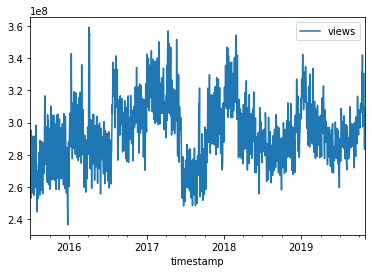

In [54]:
daily_views = df.groupby(by="timestamp").sum()
daily_views.plot(); # <-- add ";" to hide printing the object

## Get monthly total views

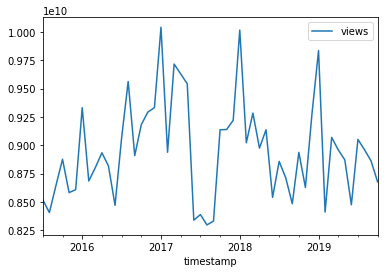

In [58]:
# Create monthly column
df["timestamp"].dt.to_period("M")

# put it in a groupby
monthly_views = df.groupby(df["timestamp"].dt.to_period("M")).sum()
monthly_views.plot();

## Get yearly total views

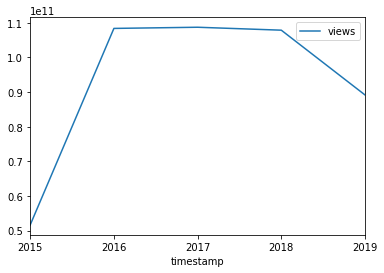

In [61]:
# Create yearly column
df["timestamp"].dt.to_period("Y")

# put it in a groupby
yearly_views = df.groupby(df["timestamp"].dt.to_period("Y")).sum()
yearly_views.plot();

### The monthly one looked interesting because of the weird dip. So we're gonna take a closer look

In [67]:
monthly_views_by_access = df.groupby([df["timestamp"].dt.to_period("M"), "access"]).sum()
monthly_views_by_access

views
timestamp access                
2015-07   desktop     5150221082
          mobile-app   109624146
          mobile-web  3257756435
2015-08   desktop     5014508034
          mobile-app   109669149
...                          ...
2019-09   mobile-app   133918888
          mobile-web  4428441751
2019-10   desktop     4460366841
          mobile-app   124925318
          mobile-web  4090741816

[156 rows x 1 columns]

Plotting didn't work. We have to create dedicated columns for each access_type

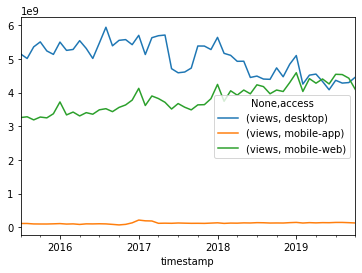

In [70]:
monthly_views_by_access.unstack().plot();